In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [2]:
df_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country']=='United States') & (df['salary_year_avg'].notna())].copy()

In [5]:
df_us = df_us.explode('job_skills')

In [ ]:
df_us_group = df_us.groupby(by=['job_skills']).agg(
    job_count=('job_title_short','count'),
    median_salary=('salary_year_avg','median'), 
    )

In [34]:
df_top_demand = df_us_group.sort_values(by='job_count',ascending=False).head(10).sort_values(by='median_salary',ascending=False)

In [26]:
df_top_pay = df_us_group.sort_values(by='median_salary',ascending=False).head(10)

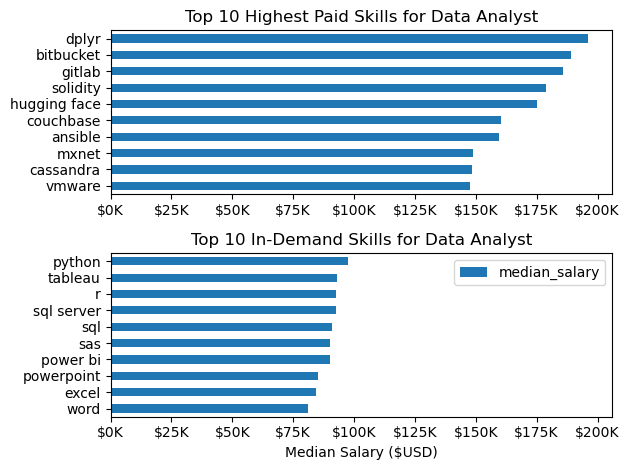

In [56]:
from matplotlib.ticker import FuncFormatter

(fig, ax) = plt.subplots(2,1)

df_top_pay.plot(kind='barh', y='median_salary', legend=False, ax=ax[0], fig=fig)	
ax[0].set_title("Top 10 Highest Paid Skills for Data Analyst")
df_top_demand.plot(kind='barh', y='median_salary', ax=ax[1], fig=fig)
ax[1].set_title("Top 10 In-Demand Skills for Data Analyst")

xlim = max([axis.get_xlim() for axis in ax])

for axis in ax:
  axis.set_xlim(xlim)
  axis.set_ylabel("")
  axis.xaxis.set_major_formatter(FuncFormatter(lambda x,_: f"${int(x/1000)}K"))
  axis.invert_yaxis()
  #axis.legend().set_visible(False)	

ax[1].set_xlabel("Median Salary ($USD)")  

fig.tight_layout()
plt.show()

In [41]:
df_top_pay.iloc[::1]

,job_count,median_salary
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [ ]:
df_top_demand